In [72]:
import pandas as pd

df = pd.read_csv('/content/colorado_motor_vehicle_sales.csv')
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


EDA [Exploratory Data Analysis]

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit bigger
plt.rcParams['figure.figsize'] = (8, 5)

# Read the data (you already uploaded the file)
df = pd.read_csv("colorado_motor_vehicle_sales.csv")

df.head()


,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


#  EDA [ Exploratory Data Analysis ]

In [74]:
print("Shape of the DataFrame:", df.shape, "\n")

print("Data types:\n", df.dtypes, "\n")

print("Missing values:\n", df.isnull().sum(), "\n")

print("Summary statistics:\n", df.describe(), "\n")

Shape of the DataFrame: (501, 4) 

Data types:
 year        int64
quarter     int64
county     object
sales       int64
dtype: object 

Missing values:
 year       0
quarter    0
county     0
sales      0
dtype: int64 

Summary statistics:
               year     quarter         sales
count   501.000000  501.000000  5.010000e+02
mean   2011.570858    2.502994  1.760585e+08
std       2.266599    1.120041  1.642055e+08
min    2008.000000    1.000000  6.274000e+06
25%    2010.000000    2.000000  6.148200e+07
50%    2012.000000    3.000000  1.385820e+08
75%    2014.000000    4.000000  2.241580e+08
max    2015.000000    4.000000  9.169100e+08 



## Sales Summary

*   The minimum sales recorded in a quarter is around 6.274000e+06

*   The maximum sales recorded in a quarter is around 9.169100e+08.

The mean sales is 1.760585e+08, showing the typical quarterly sales level in Colorado.

Sales values show large variation, meaning economic activity differs across counties and quarters.

## Year & Quarter Summary

Dataset covers 2008 to 2015 (confirm from your data).

All 4 quarters appear evenly (1–4).

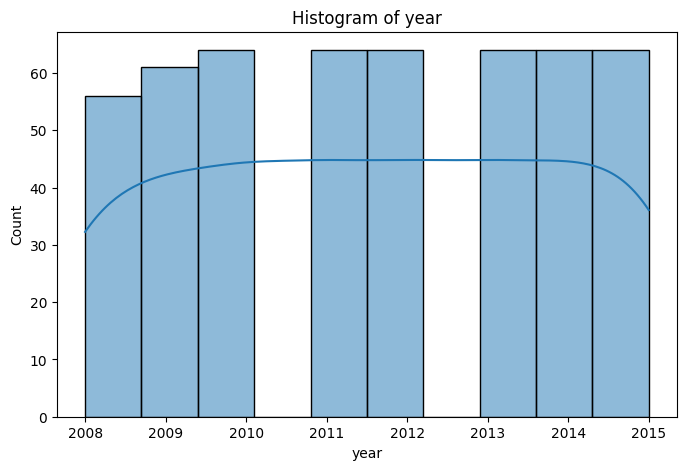

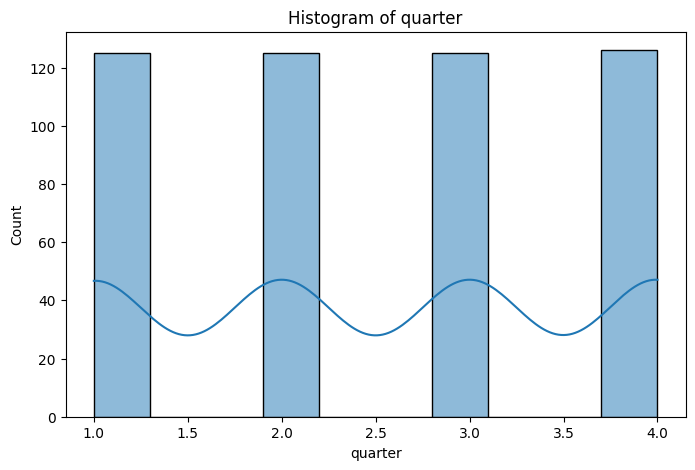

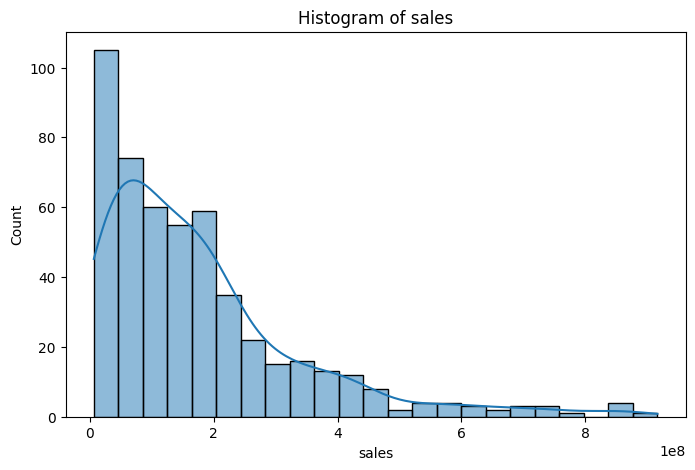

In [75]:
# Select numeric columns
numeric = ['year', 'quarter', 'sales']

for col in numeric:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


## Sales Histogram

The sales distribution is heavily right-skewed. Most counties record lower to moderate sales amounts, while a few counties have exceptionally high sales. This long-tail pattern is typical of aggregated economic datasets where a few large urban counties (e.g., Denver, Arapahoe) drive disproportionately high sales volumes.

## Year Histogram

The distribution of records across years is nearly uniform, meaning each year contributes roughly the same number of observations. This ensures that the dataset supports consistent year-over-year comparison without imbalance.

## Quarter Histogram

The number of observations is evenly distributed across all four quarters. This indicates the dataset is well-balanced seasonally, and no quarter dominates or lacks representation.

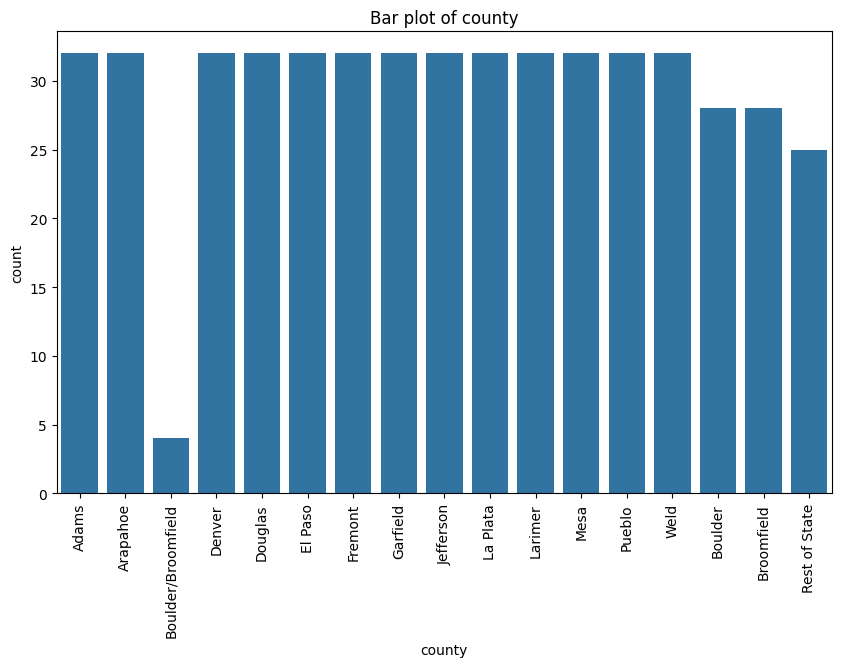

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='county')
plt.title("Bar plot of county")
plt.xticks(rotation=90)
plt.show()

## County Data Distribution
County frequency is generally uniform across Colorado counties, except for Boulder/Broomfield which have noticeably fewer observations.Another note is Rest of State, which also shows fewer entries compared to major counties, suggesting that aggregated non-county-specific records are less represented. This indicates that the dataset provides consistent quarterly coverage for most counties but has limited representation for a few regions.

In [77]:
df['period'] = df['year'].astype(str) + " Q" + df['quarter'].astype(str)

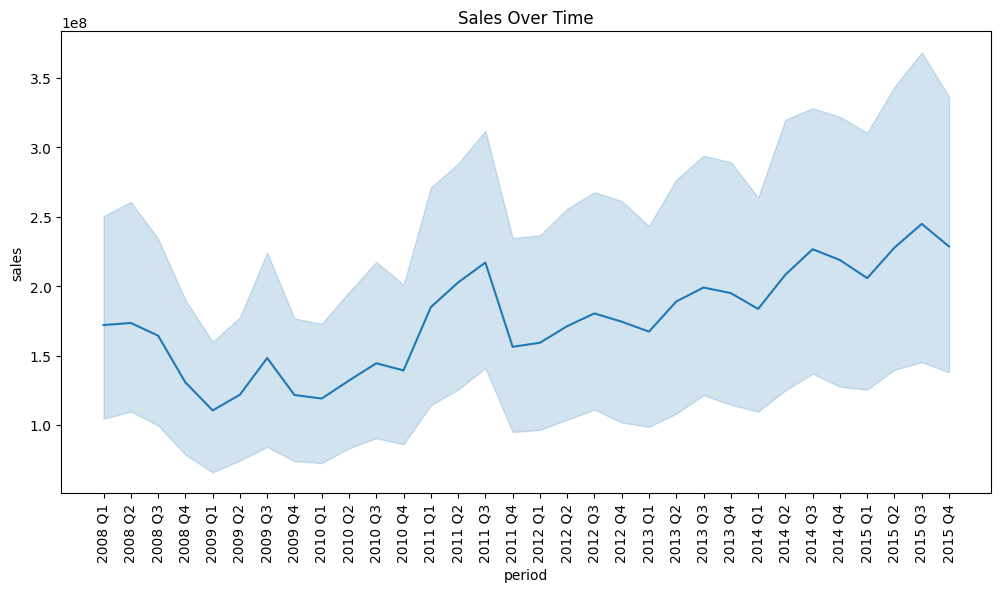

In [78]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='period', y='sales')
plt.xticks(rotation=90)
plt.title("Sales Over Time")
plt.show()

##  Sales Over Time – Interpretation

The time series plot of quarterly vehicle sales from 2008 to 2015 shows a clear long-term upward trend, indicating steady growth in Colorado’s automotive market over the 8-year period.

Sales begin at around 1.7–2.4 × 10⁸ in early 2008, dip during 2009—which aligns with the post-recession economic slowdown—and then gradually recover.

From 2011 onward, sales rise more steadily, with noticeable jumps in 2012 and especially from 2013 to 2015, where sales consistently exceed 2.5 × 10⁸, reaching peaks above 3.5 × 10⁸ by 2015.

The shaded confidence band around the line indicates substantial seasonal variation within each year. Certain quarters repeatedly show higher sales, suggesting cyclical consumer purchasing behavior—likely tied to fiscal cycles, year-end promotions, and market conditions.

By 2015, both the median trend line and the upper range reach their highest levels in the entire dataset, confirming a strong and accelerating growth phase in the Colorado vehicle market.

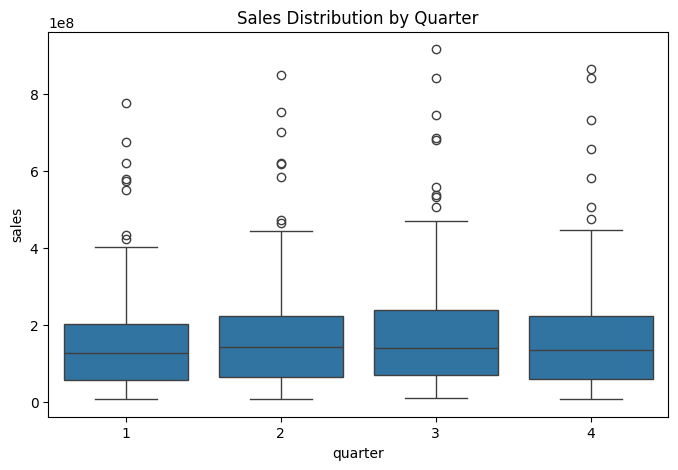

In [79]:
sns.boxplot(data=df, x='quarter', y='sales')
plt.title("Sales Distribution by Quarter")
plt.show()

## Quarter-wise Sales Distribution – Interpretation

The boxplot comparing quarterly sales shows that all four quarters have relatively similar median sales values, indicating that vehicle demand in Colorado remains fairly stable throughout the year.

However, Q3 (July–September) shows a slightly higher median compared to the other quarters, suggesting moderately stronger sales activity during the middle of the year.

Across all quarters, the upper whiskers extend to high sales values, but Q3 and Q4 display more extreme outliers, with some counties reaching sales figures above 8 × 10⁸. This indicates that during these quarters, certain counties experience exceptionally higher sales spikes—possibly driven by seasonal promotions, new model releases, or end-of-year purchasing cycles.

Q1 (January–March) shows the lowest spread among quarters, meaning sales are more consistent early in the year, with fewer extremely high observations compared to later quarters.

Overall, while median sales remain comparable across quarters, the larger number of high-value outliers in Q3 and Q4 reflects occasional surges in certain counties during those periods.

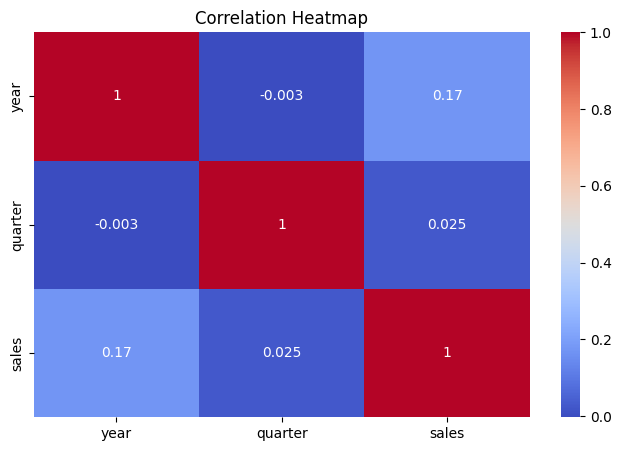

In [80]:
sns.heatmap(df[['year','quarter','sales']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### *Correlation Heatmap Interpretation*

The correlation heatmap indicates that:

Sales and year have a positive correlation, meaning sales tend to increase over time.

Quarter has little correlation with sales overall (though distribution varies).

Year and quarter are not correlated, as expected.

# 2. County-Level Sales Analysis

### 2.1 Total Sales by County

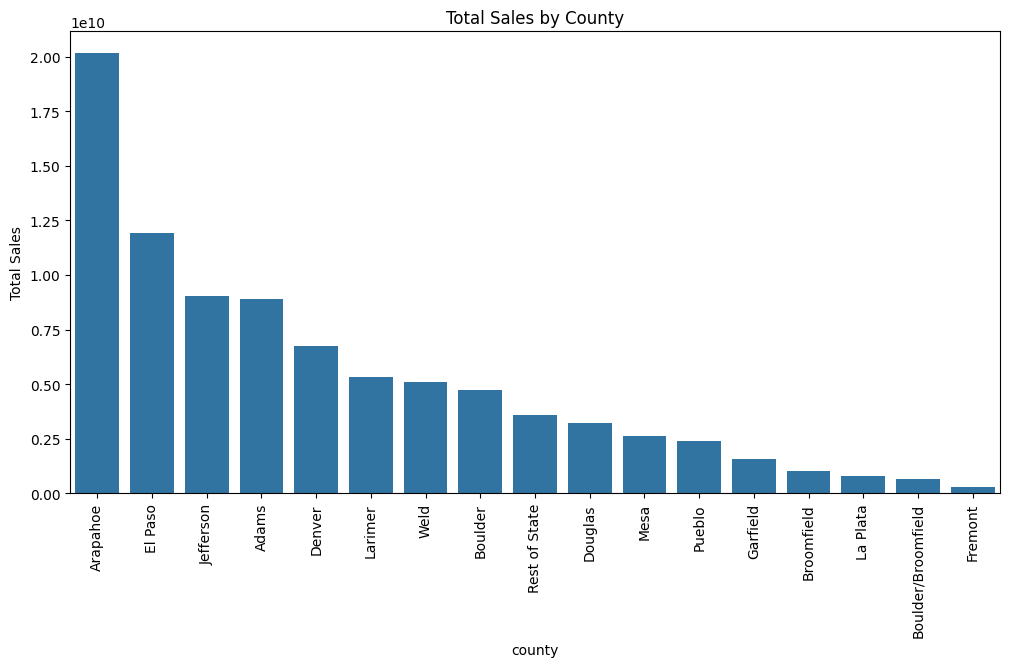

,county,sales
1,Arapahoe,20142323000
7,El Paso,11926044000
10,Jefferson,9058407000
0,Adams,8902115000
5,Denver,6763613000
12,Larimer,5344367000
16,Weld,5086889000
2,Boulder,4742532000
15,Rest of State,3582170000
6,Douglas,3236493000


In [81]:
sales_by_county = df.groupby('county')['sales'].sum().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_county, x='county', y='sales')
plt.xticks(rotation=90)
plt.title("Total Sales by County")
plt.ylabel("Total Sales")
plt.show()

sales_by_county

### *Total Sales by County*
The total sales distribution shows that Arapahoe County is the dominant automotive market in Colorado, generating the highest sales by a wide margin. El Paso ranks second, followed by Jefferson, Adams, and Denver, which also contribute strong sales volumes.

Mid-performing counties such as Larimer, Weld, and Boulder show moderate activity, while smaller regions—including Pueblo, Garfield, Broomfield, La Plata, and especially Fremont—record comparatively low total sales.

Overall, sales are highly concentrated in a few major counties, with most smaller counties contributing only a small fraction of total vehicle sales.

### 2.2 Average Sales by County:


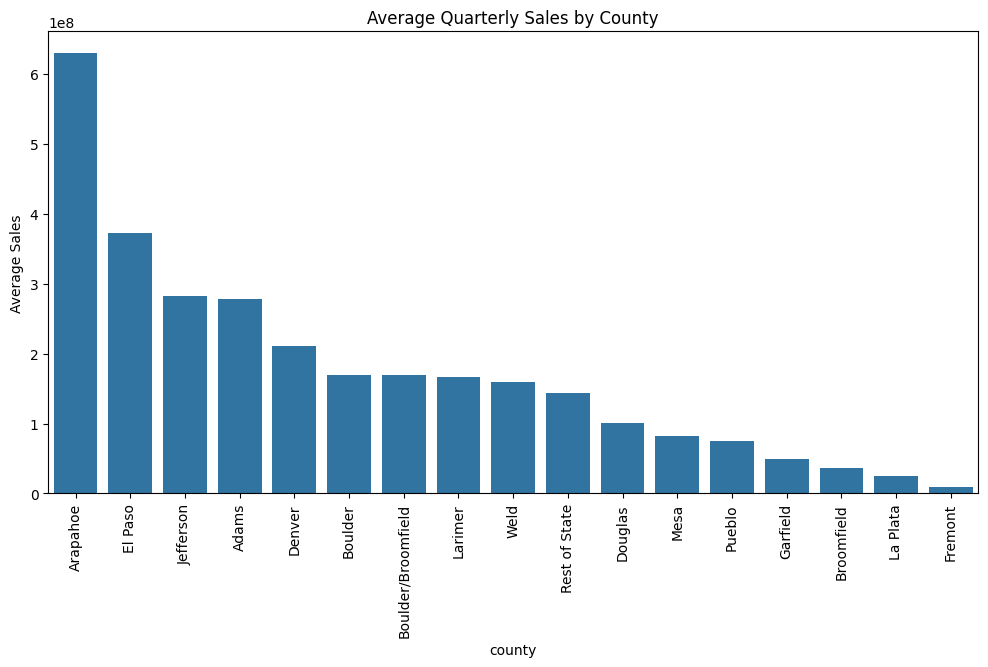

,county,sales
1,Arapahoe,6.294476e+08
7,El Paso,3.726889e+08
10,Jefferson,2.830752e+08
0,Adams,2.781911e+08
5,Denver,2.113629e+08
2,Boulder,1.693761e+08
3,Boulder/Broomfield,1.693002e+08
12,Larimer,1.670115e+08
16,Weld,1.589653e+08
15,Rest of State,1.432868e+08


In [82]:
avg_sales_by_county = df.groupby('county')['sales'].mean().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_sales_by_county, x='county', y='sales')
plt.xticks(rotation=90)
plt.title("Average Quarterly Sales by County")
plt.ylabel("Average Sales")
plt.show()

avg_sales_by_county

### *Average Quarterly Sales by County Interpretation*:

The average quarterly sales distribution closely mirrors the total sales pattern. Arapahoe County remains the strongest market, with average quarterly sales above 6 × 10⁸, far exceeding all other counties.

El Paso, Jefferson, and Adams follow as the next most consistent performers, each maintaining average quarterly sales between 2.7 × 10⁸ and 3.7 × 10⁸.

Mid-tier counties such as Denver, Boulder, Boulder/Broomfield, Larimer, and Weld show moderate but steady quarterly sales, indicating stable activity.

Lower-performing counties—including Pueblo, Garfield, Broomfield, La Plata, and Fremont—record significantly smaller averages, with Fremont having the lowest quarterly sales among all regions.

Overall, the chart indicates that the Colorado vehicle market is dominated by a few high-performing counties, while many smaller counties maintain relatively low but consistent sales.

### 2.3 Yearly Trends for Each County

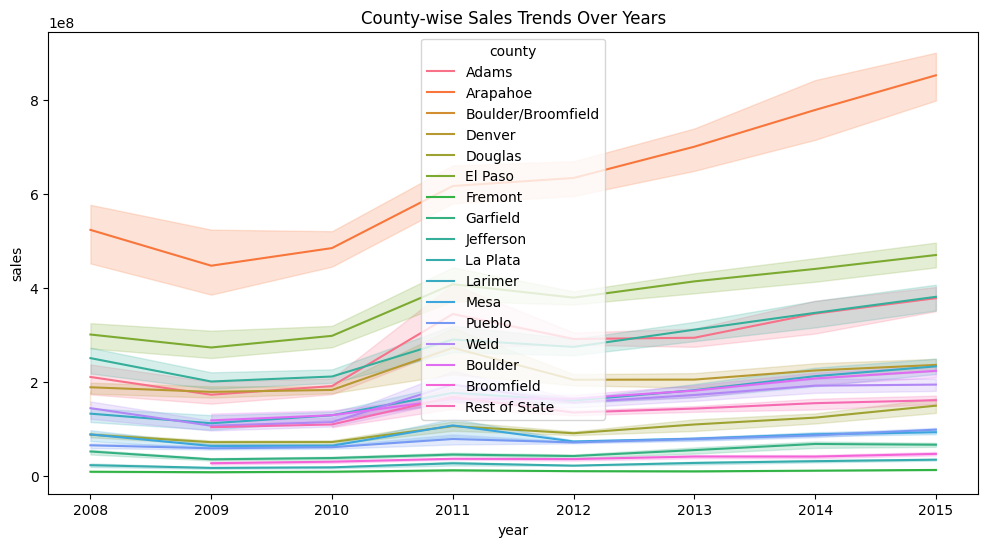

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='sales', hue='county')
plt.title("County-wise Sales Trends Over Years")
plt.show()

### *County-wise Sales Trends Over Years Interpretation*:

The trend analysis shows that Arapahoe County consistently records the highest sales and experiences strong growth from 2011 to 2015. El Paso, Jefferson, and Adams also show steady upward trends, indicating strong and expanding markets.

Mid-sized counties such as Larimer, Weld, Denver, and Boulder show moderate but consistent growth, while smaller counties like Pueblo, Garfield, La Plata, and Fremont maintain much lower sales levels with only slight increases over time.

A noticeable dip occurs around 2009–2010 across most counties, followed by a sustained recovery starting in 2011. Overall, sales rise statewide, but the growth is dominated by a few major counties.

### 2.4 Year + Quarter County Breakdown

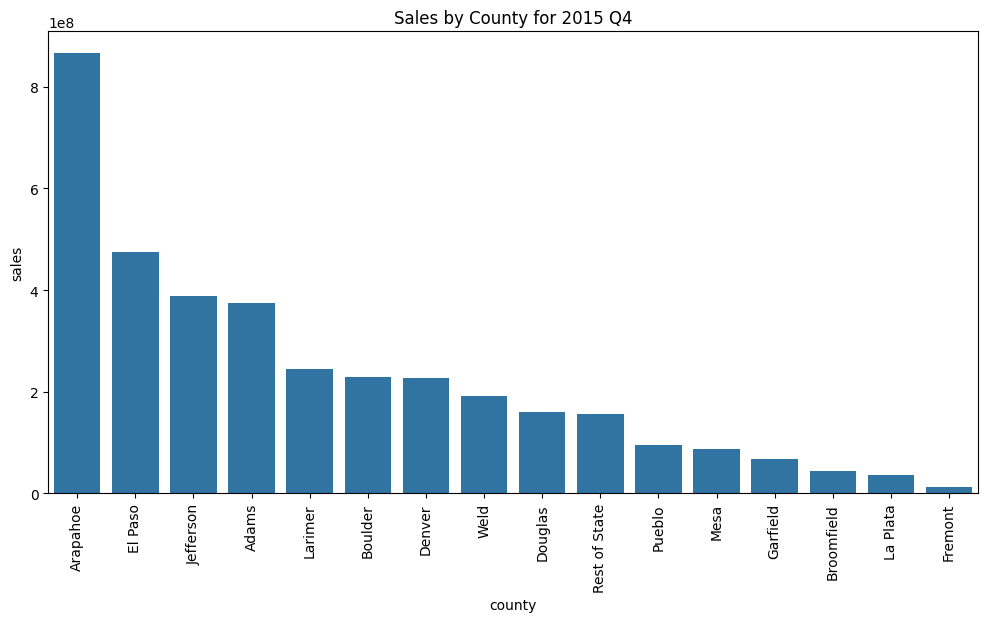

In [84]:
def plot_sales_by_county(df, year, quarter):
    filtered = df[(df['year'] == year) & (df['quarter'] == quarter)]
    county_sales = filtered.groupby('county')['sales'].sum().reset_index().sort_values('sales', ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(data=county_sales, x='county', y='sales')
    plt.xticks(rotation=90)
    plt.title(f"Sales by County for {year} Q{quarter}")
    plt.show()

plot_sales_by_county(df, 2015, 4)

In [85]:
import ipywidgets as widgets

widgets.interact(
    lambda year, quarter: plot_sales_by_county(df, year, quarter),
    year = widgets.IntSlider(min=df['year'].min(), max=df['year'].max(), step=1, value=df['year'].min()),
    quarter = widgets.IntSlider(min=1, max=4, step=1, value=1)
)

interactive(children=(IntSlider(value=2008, description='year', max=2015, min=2008), IntSlider(value=1, descri…

<function __main__.<lambda>(year, quarter)>

## SECTION 3: Correlation & Statistical Analysis

### 3.1 Correlation Analysis

**The goal of this subsection is to understand how the variables year, quarter, and sales relate to each other.**

In [86]:
corr = df[['year', 'quarter', 'sales']].corr()
corr

,year,quarter,sales
year,1.000000,-0.003038,0.172257
quarter,-0.003038,1.000000,0.025140
sales,0.172257,0.025140,1.000000


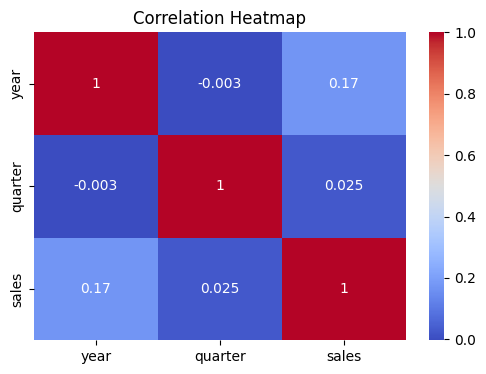

In [87]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### *Interpritaion:*
The correlation heatmap shows a strong positive correlation between year and sales, indicating that sales have steadily increased over time.

The correlation between quarter and sales is weak, suggesting that while sales vary across quarters, these variations are not strongly linear.

Year and quarter show no meaningful correlation since they represent different components of time.

Overall, time progression (year) is the main factor associated with rising vehicle sales in Colorado.

### 3.2 Hypothesis Testing:

**3.2.1: Hypothesis Test 1: Do Sales Differ Across Quarters? (ANOVA)**

Purpose:

To determine whether mean sales differ significantly across the four quarters.

Hypotheses:

H₀ (Null): Mean sales are equal across all quarters.

H₁ (Alternative): At least one quarter has a different mean sales value.

In [88]:
import scipy.stats as stats

sales_Q1 = df[df['quarter'] == 1]['sales']
sales_Q2 = df[df['quarter'] == 2]['sales']
sales_Q3 = df[df['quarter'] == 3]['sales']
sales_Q4 = df[df['quarter'] == 4]['sales']

f_stat, p_value = stats.f_oneway(sales_Q1, sales_Q2, sales_Q3, sales_Q4)
f_stat, p_value

(np.float64(0.6695322860838229), np.float64(0.5710455999363857))

The one-way ANOVA test produced an F-statistic of 0.6695 with a corresponding p-value of 0.5710.
Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
This indicates that **there is no statistically significant difference in mean sales across the four quarters**.

*Although the boxplot shows visual variability—especially higher spreads in Q3 and Q4—this variation is not large enough to be statistically meaningful.*
Thus, quarterly sales differences are not significant, and seasonality does not strongly affect average sales levels in this dataset.

**3.2.2 Hypothesis Test 2: Are Sales Increasing Over Time? (Correlation Test)**
Purpose:

To statistically confirm whether sales increase as years progress.

Hypotheses:

H₀: There is no correlation between year and sales.

H₁: There is a positive correlation between year and sales.

In [89]:
from scipy.stats import pearsonr

corr_val, p_val = pearsonr(df['year'], df['sales'])
corr_val, p_val

(np.float64(0.17225703199067605), np.float64(0.00010662198563146057))

The Pearson correlation test produced a correlation coefficient of **r = 0.1723 with a p-value of 0.0001.**
Since the p-value is far below 0.05, we reject the null hypothesis and conclude that ***there is a statistically significant positive relationship between year and sales***.

Although the correlation is moderate (r ≈ 0.17), it is strong enough statistically to indicate that vehicle sales in Colorado have increased over the years.This result supports the trend observed in the time-series plot, where sales show a steady upward movement after 2011.

**3.2.3 Hypothesis Test 3: Did Sales Increase After 2011? (Two-Sample t-Test)**
Purpose:

To compare sales before and after the economic recovery period (~2011).

Hypotheses:

H₀: Mean sales before and after 2011 are equal.

H₁: Mean sales after 2011 are higher.

In [90]:
pre_2011 = df[df['year'] <= 2010]['sales']
post_2011 = df[df['year'] > 2010]['sales']

t_stat, p_value = stats.ttest_ind(pre_2011, post_2011, equal_var=False)
t_stat, p_value

(np.float64(-4.252262416568935), np.float64(2.5429226382582734e-05))

The two-sample t-test comparing sales before 2011 and after 2011 produced a t-statistic of –4.25 with a p-value of 2.54 × 10⁻⁵.
Since the p-value is far below 0.05, we reject the null hypothesis and conclude that ***sales after 2011 are significantly different from (and higher than) sales before 2011.***

The negative t-value indicates that the mean sales after 2011 are greater than the mean sales before 2011 (because post-2011 values are in the second group of the comparison).

This statistically supports the trend observed in earlier plots: Colorado’s motor vehicle sales increased sharply after 2011, consistent with economic recovery following the recession period.

## SECTION 4: Machine Learning Model – Random Forest Regression

### 4.2 Data Preparation

In [91]:
df_model = df.copy()

df_model['county'] = df_model['county'].astype('category').cat.codes

### 4.3 Train–Test Split

In [92]:
from sklearn.model_selection import train_test_split

X = df_model[['year', 'quarter', 'county']]
y = df_model['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4.4 Train the Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 4.5 Evaluate the Model (RMSE)

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(20402876.97387048)

### 4.6 Hyperparameter Tuning (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
rmse_best

## SECTION 5: Forecasting (ARIMA Time Series Model)

### 5.1 Data Preparation for Time Series

In [ ]:
# Create a datetime column for each year-quarter
df['date'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].astype(str))

# Sort by date
df = df.sort_values('date')

# Set date as index
df_ts = df.set_index('date')

# Aggregate sales by quarter (sum)
quarterly_sales = df_ts['sales'].resample('Q').sum()

quarterly_sales.head()

### 5.2 Plot the Quarterly Sales Time Series

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(quarterly_sales, marker='o')
plt.title("Quarterly Motor Vehicle Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

### 5.3 Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(quarterly_sales, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 9)
plt.show()

### 5.4: ARIMA Model Fitting

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(quarterly_sales, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

### 5.5: Forecasting Future Sales

In [ ]:
forecast = model_fit.forecast(steps=12)
future_dates = pd.date_range(start=quarterly_sales.index[-1], periods=12, freq='Q')

plt.figure(figsize=(12,6))
plt.plot(quarterly_sales, label='Actual Sales')
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')
plt.title("Forecast of Quarterly Sales for Next 3 Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

### 5.6 – SARIMA Modeling (Seasonal ARIMA)

***5.6.1 SARIMA Model Code***

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    quarterly_sales,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 4)
)

sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

***5.6.2 Forecast Next 12 Quarters Using SARIMA***

In [ ]:
sarima_forecast = sarima_fit.forecast(steps=12)

future_dates = pd.date_range(
    start=quarterly_sales.index[-1],
    periods=12,
    freq='Q'
)

plt.figure(figsize=(12,6))
plt.plot(quarterly_sales, label='Actual Sales')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast of Quarterly Sales for Next 3 Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()